# Satellites to Jupiter 
##### Author $\bf{Guner}$ $\bf{Aygin}$

### Project Summary

https://www.eidos.ic.i.u-tokyo.ac.jp/~tau/lecture/computational_physics/docs/computational_physics.pdf

This  project  addresses  the  issue  of  how  to  use  the  existence  of  the  planet  Jupiter  to  save  NASA money. A satellite is made on Earth and then needs to be transported to its eventual ‘home’ outside of the solar system (c.f.  the Voyager probes).  There are two parts to this:  one is called the “gravity assist” from Jupiter, and the second is the issue of how to transfer between orbits. At first sight, one might calculate the difference in potential energy between the initial and eventual positions of the satellite and then provide that in kinetic energy, at great expense to NASA. Although with only two bodies (the satellite and the Sun) there is no way to avoid the payment in potential energy, with three bodies (including Jupiter), the satellite can gain kinetic energy created from the potential  energy  between  the  other  two.  It  is  this  effect  that  you  will  investigate:  In  simple  terms, the satellite can pick up kinetic energy by ‘bouncing off’ Jupiter, known as a “gravity assist”. In  order  to  transfer  between  the  Earth’s  orbit  and  Jupiter’s,  one  uses  a transfer  orbit. An  example of this is the Hohmann transfer orbit, as depicted below:


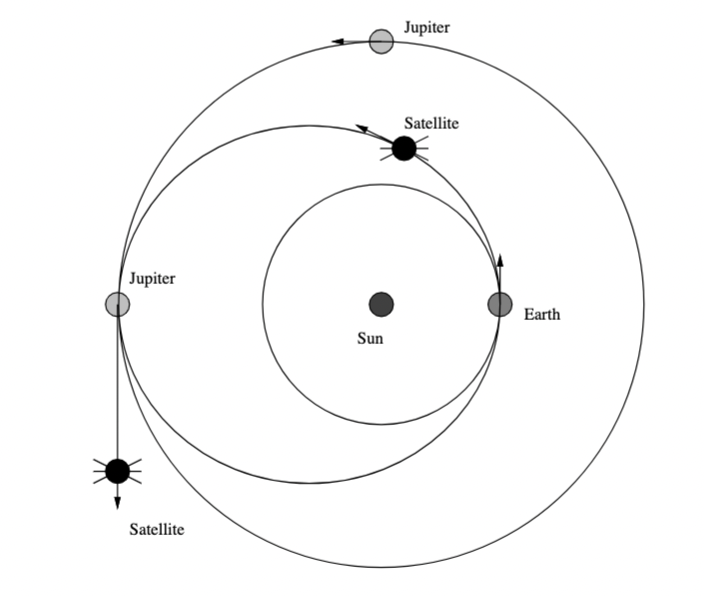

In  order  to  minimise  the  expense,  the  first  task  is  to  decide when to  launch  in  order  to  achieve close  approach  to  Jupiter  with  the  minimum  orbit  depicted.  The  next  task  is  to  find  out  the  best configuration for the satellite and Jupiter when they meet, in order to achieve the maximum impulse to the satellite.

### 0. Data:

In [1]:
''' importing necessary libraries '''

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.constants import physical_constants as pc_dict
from mpl_toolkits import mplot3d 
from scipy.integrate import odeint

''' This is the data given in the project sheet '''

G = 0.667e-10      # m^3 kg^-1 s^-2  # Gravitational Constant
M_sun = 0.1984e31  # kg  # mass of sun
M_earth = 0.5976e25  # kg  # mass of earth
M_jup = 0.1903e28  # kg  # mass of jupiter
R_eo = 0.1495e12  # m  # radius of earth's orbit
R_jo = 0.7778e12  # m  # radius of jupiter's orbit
R_earth = 0.6368e7  # m  # radius of earth
R_jup = 0.6985e8  # m  # radius of jupiter
AU = 1.495978707e11 # m  # Astronomical Unit 

## 1. Transfer Orbit:
Q: (a)  Calculate when to  launch  the  satellite,  based  upon  the  radii  of  the  orbits  of  Earth  and Jupiter, assuming that both planets have circular orbits and ignoring all potentials except that of the sun.


A: The orbits are assumed to be circular, and as we can ignore the potentials of everything except from the sun, we can equate the centripetal acceleration to the graviational acceleration of the sun for both the Earth and Jupiter.


##### $ F_{Gravity} =  F_{Centripetal} $

#### $ \frac{G M_{\odot} m}{r^2} = \frac{mv^2}{r}$


$G$ is Newton's Gravitational constant,
$M_{\odot}$ is mass of the sun,
$m$ is mass of Earth/Jupiter,
$r$ is the distance between the centre of mass of the two bodies,
$v$ is the velocity of the orbit.

This leads us to expressions for the orbital velocity and time period:

#### $ v = \sqrt \frac{GM_{\odot}}{r} $
#### $ T = \frac{2 \pi r^{3/2}}{\sqrt{GM_{\odot}}} $

In [2]:
v_jup = np.sqrt(G*M_sun/R_jo) # velocity of Jupiter
v_earth = np.sqrt(G*M_sun/R_eo) # velocity of Earth

T_jup = 2*np.pi*R_jo**(3/2)/(np.sqrt(G*M_sun)) # orbital period of Jupiter
T_earth = 2*np.pi*R_eo**(3/2)/(np.sqrt(G*M_sun)) # orbital period of Earth

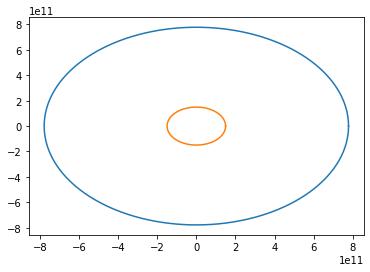

In [3]:
''' Coordinates of orbits of Jupiter and the Earth around the Sun '''

theta = np.linspace(0, 2*np.pi, num=10000) # 360 degrees around the sun (1 orbit), split into 10000 angles

x_jup = R_jo*np.cos(theta)
y_jup = R_jo*np.sin(theta)

x_earth = R_eo*np.cos(theta)
y_earth = R_eo*np.sin(theta)

'''
This gives position as a function of angle theta,
but we want it as a function of time
'''
plt.plot(x_jup,y_jup)
plt.plot(x_earth,y_earth)
plt.show()

This could be projected into 3D, but as all orbits lie in an approximately flat plane, 2D will suffice.

The best time to launch a satellite is when, after half an orbit, the satellite reaches Jupiter, as depicted in the first image above. This orbital is elliptical around the sun, and corresponds with a semi-major axis equal to $\frac{1}{2}$(R_eo + R_jo).

In [4]:
a_sat = 0.5*(R_eo + R_jo) # semi-major axis of satellite

We need to calculate how long it will take for the satellite to complete half an orbit, and then reverse engineer the distance that the Earth must be from Jupiter at launch time, such that the satellite intercepts Jupiter.

The $x$ and $y$ coordinates of the planet are given by:

$x = r \cos\left(\frac{2 \pi t}{T}\right)$

$y = r \sin\left(\frac{2 \pi t}{T}\right)$

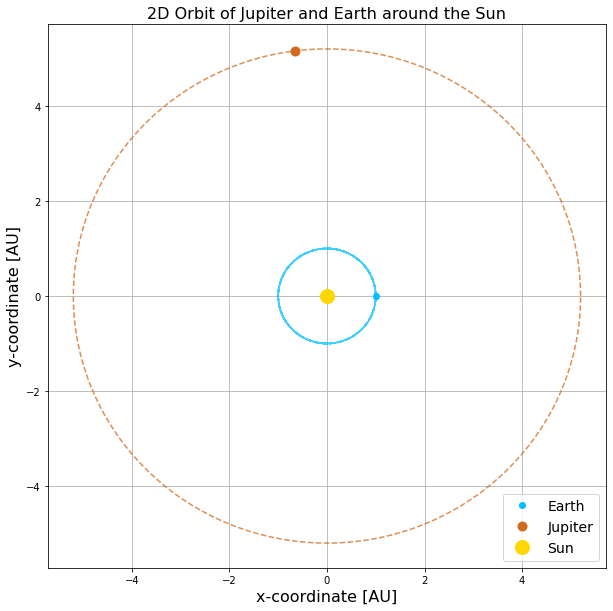

The Earth must be 8.101E+11 m away from Jupiter at launch, or 5.42 AU.


In [5]:
''' Finding the distance between Earth and Jupiter at launch time '''

T_sat = 2*np.pi*a_sat**(3/2)/(np.sqrt(G*M_sun))  # time period of satellite - only depends on semi-major axis

points = 100000  # sets precision of time. If this was actually NASA then set points to 1e9, but that takes too long...
t = np.linspace(0,T_jup,points)  # time from 0 to one full orbit for Jupiter

t_spacing = t[2]-t[1] # time interval between points in seconds, more precice if number of points is larger

launch_pos_subtracter = int(0.5* T_sat/t_spacing) # number of points we need to go back from peak position when launching


''' Coordinates of Earth and Jupiter as a function of time '''

x_jup = R_jo*np.cos(2*np.pi*t/T_jup)
y_jup = R_jo*np.sin(2*np.pi*t/T_jup)

x_earth = R_eo*np.cos(2*np.pi*t/T_earth)
y_earth = R_eo*np.sin(2*np.pi*t/T_earth)

Distance = np.sqrt((x_jup-x_earth)**2 + (y_jup-y_earth)**2) # distance between Jupiter and Earth

''' Finding when the satellite launches '''

x_jup_sat = -x_jup[points-1 - launch_pos_subtracter] # x position of Jupiter at satellite launch
y_jup_sat = -y_jup[points-1 - launch_pos_subtracter] # y position of Jupiter at satellite launch


# Note: final x-position of Jupiter is at x_jup[points-1], after one full orbit. We are subtracting the number of points
# which corresponds to 1/2 T_sat before the satellite reaches Jupiter. This is to ensure that the satellite reaches Jupiter
# at the final x-position.

# We know that, at launch, the Earth needs to be situated such that it is furthest away from where Jupiter would be when
# it is intercepted with the satellite. The y-position of Earth is zero at launch.

x_earth_sat = -np.min(x_earth) 
y_earth_sat = 0

launch_distance = np.sqrt((x_jup_sat - x_earth_sat)**2 + (y_jup_sat - y_earth_sat)**2)  # distance between Earth and Jupiter at optimal launch time


''' Plotting the position of the planets at launch time '''

fig = plt.figure(figsize=(10,10))
ax = plt.plot(x_jup/AU, y_jup/AU, 'chocolate', linestyle='--', alpha=0.75)
ax = plt.plot(x_earth/AU, y_earth/AU, 'deepskyblue', linestyle='--', alpha=0.75)
plt.plot(x_earth_sat/AU, 0, 'deepskyblue', marker='o', linestyle='', markersize=6, label='Earth')
plt.plot(x_jup_sat/AU,y_jup_sat/AU,'chocolate', marker = 'o', linestyle='', markersize=9, label='Jupiter')
plt.plot(0, 0, 'gold', marker='o', linestyle='', markersize=14, label='Sun')
plt.grid()
plt.xlabel('x-coordinate [AU]', size=16)
plt.ylabel('y-coordinate [AU]', size=16)
plt.title('2D Orbit of Jupiter and Earth around the Sun', size=16)
plt.legend(loc = 'lower right', prop={'size':14})
plt.show()

print(f'The Earth must be {launch_distance/1e11:.3f}E+11 m away from Jupiter at launch, or {launch_distance/AU:.2f} AU.')

In [6]:
print(0.5*T_sat)

print(t[launch_pos_subtracter])

86218709.47012666
86215998.26226766


We can use the cosine rule to determine the angle between Earth and Jupiter at launch time.

$cos(\theta) = \frac{b^2 + c^2 - a^2}{2bc}$,

where $a$ is the straight line between Jupiter and Earth, $b$ is the distance between the Sun and the Earth, and $c$ is the distance between the Sun and Jupiter. 

In [7]:
a = launch_distance 
b = np.sqrt(x_earth_sat**2 + y_earth_sat**2)
c = np.sqrt(x_jup_sat**2 + y_jup_sat**2)

theta_jup = np.arccos((b**2 + c**2 - a**2)/(2*b*c)) * (180/np.pi) 

print(f'Angle of Jupiter is {theta_jup:.1f} degrees wrt Earth')

Angle of Jupiter is 97.2 degrees wrt Earth


This is the position we need the Earth and Jupiter to be (with the orbitals moving in an anti-clockwise direction). We can measure this distance between the planets, but as we will see, this distance corresponds to two different orientations of Earth and Jupiter. One where Jupiter is ahead of Earth (correct), and one when Jupiter is behind Earth (incorrect).

These two positions correspond to the maximum and minimum efficiency trasnfers. When Jupiter is behind Earth, the satellite would require a very large velocity to catch up with the Earth, whereas when Jupiter is ahead of Earth the satellite will orbit around the sun such that it intercepts Jupiter with maximum efficiency.

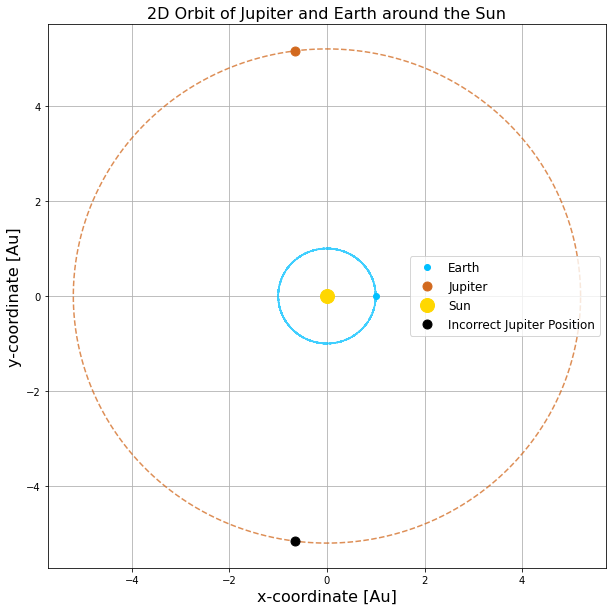

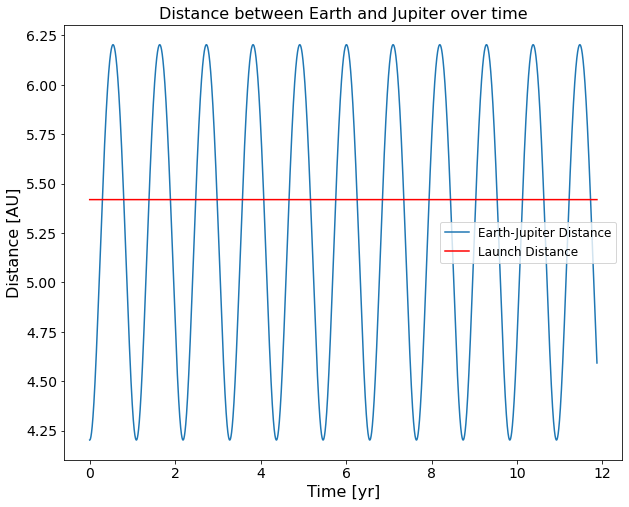

In [8]:
fig = plt.figure(figsize=(10,10))
ax = plt.plot(x_jup/AU, y_jup/AU, 'chocolate', linestyle='--', alpha=0.75)
ax = plt.plot(x_earth/AU, y_earth/AU, 'deepskyblue', linestyle='--', alpha=0.75)
plt.plot(x_earth_sat/AU, 0, 'deepskyblue', marker='o', linestyle='', markersize=6, label='Earth')
plt.plot(x_jup_sat/AU,y_jup_sat/AU,'chocolate', marker = 'o', linestyle='', markersize=9, label='Jupiter')
plt.plot(0, 0, 'gold', marker='o', linestyle='', markersize=14, label='Sun')
plt.plot(x_jup_sat/R_eo,-y_jup_sat/R_eo,'ko', markersize=9, label='Incorrect Jupiter Position')
plt.grid()
plt.xlabel('x-coordinate [Au]', size=16)
plt.ylabel('y-coordinate [Au]', size=16)
plt.title('2D Orbit of Jupiter and Earth around the Sun', size=16)
plt.legend(prop={'size':12})
plt.show()

''' Plotting distance between Earth and Jupiter '''

fig = plt.figure(figsize=(10,8))
plt.plot(t/(365.25*24*60**2),Distance/R_eo,label='Earth-Jupiter Distance')
plt.plot(t/(365.25*24*60**2),launch_distance*np.ones(points)/R_eo, 'r',label='Launch Distance')
plt.title('Distance between Earth and Jupiter over time',size=16)
plt.xlabel('Time [yr]',size=16)
plt.ylabel('Distance [AU]',size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(prop={'size':12})
plt.show()

In [9]:
print(f'To conclude: the satellite must be launched when Jupiter is at an angular position of {theta_jup:.1f} degrees, and a distance {launch_distance/1e11:.3f}E+11 m away, and it will take the satellite {0.5*T_sat/(365.25*24*60**2):.2f} years to arrive at Jupiter.')

To conclude: the satellite must be launched when Jupiter is at an angular position of 97.2 degrees, and a distance 8.101E+11 m away, and it will take the satellite 2.73 years to arrive at Jupiter.


### Simulating the transfer orbit

Unlike the planetary orbits (which we are assuming to be circular), the transfer orbit has a non-zero eccentricity.
The radius of the orbit is determined by $r = \frac{a(1-e^2)}{1+e \cos f}$. Since we know that at Periapsis the radius $r_p = R_{earth} = a(1-e)$, we can determine the eccentricity of the orbit.

In [10]:
e = 1 - R_eo/a_sat # eccentricity of the satellite's orbit

def radius(a, e, f):
    ''' defines the radius of orbit as given by the equation for r above'''
    r = (a*(1-e**2))/(1+e*np.cos(f))
    return r

''' Position of satellite during transfer '''
points = 10000
t_sat = np.linspace(0,T_sat,points)
r_sat = radius(a_sat, e, 2*np.pi*t_sat/T_sat)
x_sat = r_sat*np.cos(2*np.pi*t_sat/T_sat)
y_sat = r_sat*np.sin(2*np.pi*t_sat/T_sat)

print(e)

0.677558503181279


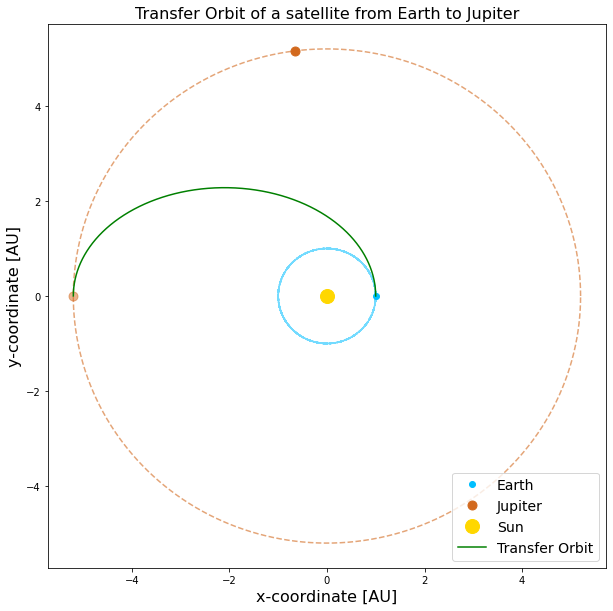

In [11]:
''' Planetary Positions plus Transfer Orbit '''

fig = plt.figure(figsize=(10,10))
plt.plot(x_jup/AU, y_jup/AU, 'chocolate', linestyle='--', alpha=0.6) 
plt.plot(x_earth/AU, y_earth/AU, 'deepskyblue', linestyle='--', alpha=0.55) 
plt.plot(x_earth_sat/AU, 0, 'deepskyblue', marker='o', linestyle='', markersize=6, label='Earth')
plt.plot(x_jup_sat/AU,y_jup_sat/AU,'chocolate', marker = 'o', linestyle='', markersize=9, label='Jupiter')
plt.plot(np.min(x_jup)/AU,0/AU,'chocolate', marker = 'o', linestyle='', markersize=9, alpha=0.5) # position of Jupiter at interception
plt.plot(0, 0, 'gold', marker='o', linestyle='', markersize=14, label='Sun')
plt.plot(x_sat[:int(points/2)]/AU,y_sat[:int(points/2)]/AU, color='green', label='Transfer Orbit')
plt.xlabel('x-coordinate [AU]', size=16)
plt.ylabel('y-coordinate [AU]', size=16)
plt.title('Transfer Orbit of a satellite from Earth to Jupiter', size=16)
plt.legend(loc = 'lower right', prop={'size':14})
#plt.savefig('transfer pic.png')
plt.show()

##### (b)  Calculate the required impulse for this Hohmann transfer.

https://ocw.mit.edu/courses/aeronautics-and-astronautics/16-07-dynamics-fall-2009/lecture-notes/MIT16_07F09_Lec17.pdf

https://www.youtube.com/watch?v=p4fVnCbZxf0

Impulse $J = \int F dt = \int \frac{dp}{dt} dt = \Delta p = m \Delta v $. The Hohmann transfer for this orbit is the transfer from Earth's orbit to Jupiter's orbit.

When the satellite launches from Earth it must thrust in the direction of its velocity vector, in order to increase it's velocity and consequently radius. This results in two impulses for the orbit, an impulse from the Earth orbit to the Hohmann transfer, and from the Hohmann transfer to Jupiter's orbit. 

For convinience, we will define the gravitational paramater $ \mu = GM_\odot $

As impulse $m \Delta v$ depends on the mass of the satellite, which is unknown, we will simply call the value $\Delta v$ the impulse. 

$\Delta v_{departure} = v_{Hohmann, Earth} - v_{Earth} = \sqrt{\mu \left(\frac{2}{R_{Earth}} - \frac{1}{a_{sat}} \right)} - \sqrt{\frac{\mu}{R_{Earth}}}$

$\Delta v_{arrival} = v_{Jupiter} - v_{Hohmann, Jupiter} = \sqrt{\frac{\mu}{R_{Jupiter}}} - \sqrt{\mu \left(\frac{2}{R_{Jupiter}} - \frac{1}{a_{sat}} \right)} $

In [12]:
mu = G*M_sun

v_hohmann_earth = np.sqrt(mu*(2/R_eo - 1/a_sat)) # initial velocity of satellite

v_hohmann_jupiter = np.sqrt(mu*(2/R_jo - 1/a_sat)) # final velocity of satellite

impulse_departure = v_hohmann_earth - v_earth  # going from Earth orbit into transfer
impulse_arrival = v_jup - v_hohmann_jupiter  # going from transfer into Jupiter orbit

overall_impulse = impulse_departure + impulse_arrival # units are m/s
print(f'Overall impulse = {overall_impulse/1e3:.2f} km/s')

Overall impulse = 14.42 km/s


##### (c)  Generate  a  system  of  first  order  equations  for  the  motion  of  the  satellite  and  verify  the transfer orbit numerically. 

http://www.wiu.edu/cas/mathematics_and_philosophy/graduate/equations-planetary-motion.pdf

https://www.gsjournal.net/Science-Journals/Research%20Papers-Astrophysics/Download/3763

The force acting on the satellite during the transfer is due to the force of gracvity from another massive body of mass $M$ at a distance $R$ away, given by 

$F = \frac{M m}{R^2}$,


In 2D, the force is comprised of $F_x$ and $F_y$, given by:

$F_x = F \frac{x' - x}{R}$

$F_y = F \frac{y' - y}{R}$

where $x$ and $y$ are the respective coordinates of the satellite, and $x'$ and $y'$ are the respective coordinates of the other body. 

We also know from Newton's second law $F=ma = m \frac{dv}{dt}$, and we obtain the equations:

$F_x = m \frac{d^2x}{dt^2}$

$F_y = m \frac{d^2y}{dt^2}$


Combining the two sets of equations we obtain the following second order differential equations:

$\frac{d^2x}{dt^2} = G M' \frac{x' - x}{R^3}$ 

$\frac{d^2y}{dt^2} = G M' \frac{y' - y}{R^3}$

where $M'$ is the mass of the other body, and $R$ is the distance between the two bodies, given by $R = \sqrt{(x' - x)^2 + (y' -y)^2}$, and we know $v$ from our equation earlier.

In Python however we use a first order differential equation solver, scipy.integrate.odeint
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

Therefore, we need to convert these second order differential equations into two first order differential equations.

We can do this by defininig $ \dot x(t) = v_x(t)$

$\dot v_x(t) = \frac{GM'(x'-x)}{R^3} $


and similarly for $\dot y(t) =  v_y(t)$, 

$\dot v_y(t) = \frac{GM'(y'-y)}{R^3} $


In the following case, when the satellite is only interacting with the Sun, $x'$ and $y'$ are $0$, and $M' = M_{\odot}$.

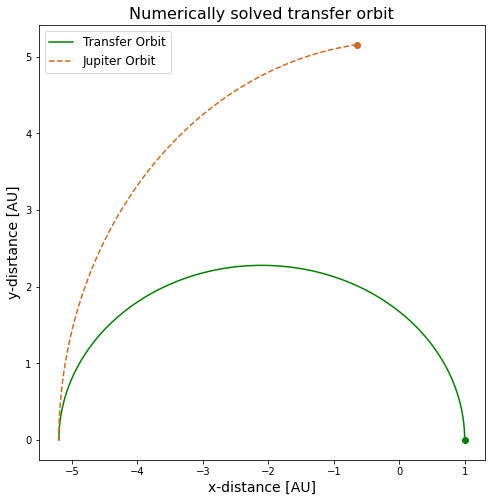

In [13]:
''' Simultaneously solving the two second order differential equations of motion '''

def orbit(Z, t, G, M):
    '''
    This function returns a 4-dimensional
    array of what needs to be solved
    '''
    x, y, v_x, v_y = Z     # Z is a 4-dimensional array 
    
    R = np.sqrt(x**2 + y**2)
    
    dxdt = v_x   # dx/dt
    dydt = v_y  # dy/dt
    v_xdt = -G*M_sun*x/R**3 # dv_x/dt
    v_ydt = -G*M_sun*y/R**3 #dv_y/dt
    dZdt = [dxdt, dydt, v_xdt, v_ydt]
    return dZdt 


''' Integrating to find solution of satellite motion '''

Z_sat0 = [x_earth_sat, 0, 0, v_hohmann_earth]  # initial conditions of sat
t = np.linspace(0,T_sat/2,100000)     # Hohmann transfer time


sol_sat = odeint(orbit, Z_sat0, t, args=(G, M_sun))


''' Using cosine rule again to find v_x and v_y for Jupiter '''

a = np.sqrt((0-x_jup_sat)**2 + (R_jo - y_jup_sat)**2)
b = c = R_jo
angle = np.arccos((b**2 + c**2 - a**2)/(2*b*c))


v_xjup = -v_jup*np.cos(angle)
v_yjup = -v_jup*np.sin(angle)

''' Integrating to find solution of Jupiter's motion '''

Z_jup0 = [x_jup_sat, y_jup_sat, v_xjup, v_yjup]
sol_jup = odeint(orbit, Z_jup0, t, args=(G, M_sun))

fig = plt.figure(figsize=(8,8))
plt.plot(sol_sat[:,0]/AU, sol_sat[:,1]/AU, label='Transfer Orbit', color='green')
plt.plot(sol_jup[:,0]/AU, sol_jup[:,1]/AU,label='Jupiter Orbit', linestyle='--' ,color='chocolate')
plt.plot(sol_sat[0,0]/AU, sol_sat[0,1]/AU, color='green', marker='o')
plt.plot(sol_jup[0,0]/AU, sol_jup[0,1]/AU, color='chocolate', marker='o')
plt.title('Numerically solved transfer orbit',size=16)
plt.xlabel('x-distance [AU]',size=14)
plt.ylabel('y-disrtance [AU]',size=14)
plt.legend(prop={'size':12})
plt.show()

This graph here shows that the transfer orbit does work numerically, both orbits intercept at the same point. 



## 2. Gravity Assist:

##### (a) Can you get a gravity assist in one dimension?

A gravity assist can be modelled as an $\textbf{elastic collision}$. In an elastic collision both kinetic energy and momentum are conserved.

$\frac{1}{2}m_1u_1 + \frac{1}{2}m_2u_2 = \frac{1}{2}m_1v_1 + \frac{1}{2}m_2v_2$

$m_1u_1 + m_2u_2 = m_1v_1 + m_2v_2 $

These equations can be simultaneously solved:

$m_1(v_1^2 - u_1^2) = m_2(u_2^2 - v_2^2)$

$m_1(v_1 - u_1) = m_2(u_2 - v_2)$

There are two solutions to this equation. $v_1 = u_1$, and $v_2 = u_2$; or $v_2 = u_2$, and $v_1 = 2u_2 - u_1$ (for $m_2 >> m_1$)

One of the solutions tells us that nothing changes, and that the two particles continue on their paths with the same velocity.

The other solutions tells us that one of the particles changes direction, due to the $-u_1$.

As a gravity assist involves a change in velocity, we can say that the first solution does not describe a gravity assist. 

The second solution however, does. Can this happen in one dimension though?

To test this I will simulate the 1D case.

In [14]:
"""


'''

Note: this block of code is not what I end up using, but is instead left here to show
      my thought process and where I started.

'''

def oneD_orbit(X, t, G, M):
    '''
    This function returns a 2-dimensional
    array of what needs to be solved
    '''
    x, v_x = X     # Z is a 2-dimensional array 
    
    if np.abs(x)>100: # to avoid dividing by 0
        R = np.sqrt(x**2)
        dxdt = v_x   # dx/dt
        v_xdt = -G*M*x/R**3 # dv_x/dt
        dXdt = [dxdt, v_xdt]
        return dXdt
    else:
        R = np.sqrt(x**2)
        dxdt = v_x   # dx/dt
        v_xdt = 0 # dv_x/dt
        dXdt = [dxdt, v_xdt]
        return dXdt
         # requires an array with equal size of X

''' 

    Integrating to find how satellite behaves due to Jupiter's gravity
    
    We are taking Jupiter to be stationary, and expect that position oscillates between
    initial position and (-)initial position.
    
'''
t = np.linspace(0,0.25e7,1000) 
X_0 = [-0.05*AU,0]  # initial conditions of sat


solution = odeint(oneD_orbit, X_0, t, args=(G, M_jup))

plt.plot(t,solution[:,0])
plt.ylabel('Position')
plt.show()
plt.plot(t,solution[:,1])
plt.ylabel('Velocity')
plt.show()


"""

"\n\n\n'''\n\nNote: this block of code is not what I end up using, but is instead left here to show\n      my thought process and where I started.\n\n'''\n\ndef oneD_orbit(X, t, G, M):\n    '''\n    This function returns a 2-dimensional\n    array of what needs to be solved\n    '''\n    x, v_x = X     # Z is a 2-dimensional array \n    \n    if np.abs(x)>100: # to avoid dividing by 0\n        R = np.sqrt(x**2)\n        dxdt = v_x   # dx/dt\n        v_xdt = -G*M*x/R**3 # dv_x/dt\n        dXdt = [dxdt, v_xdt]\n        return dXdt\n    else:\n        R = np.sqrt(x**2)\n        dxdt = v_x   # dx/dt\n        v_xdt = 0 # dv_x/dt\n        dXdt = [dxdt, v_xdt]\n        return dXdt\n         # requires an array with equal size of X\n\n''' \n\n    Integrating to find how satellite behaves due to Jupiter's gravity\n    \n    We are taking Jupiter to be stationary, and expect that position oscillates between\n    initial position and (-)initial position.\n    \n'''\nt = np.linspace(0,0.25e7,1000)

This code doesn't work very well (although I have made some mistakes with the code, which I will not correct as I have found a better method to code it). It is left here for completeness. 

The code struggles to cope with the singularity at R=0, and also depends on the starting paramaters, which are not ideal.

Instead of the differential equation used above, we can use 

$\frac{d^2x}{dt^2} = 2A\cdot G\cdot M\cdot (x'-x) \exp(-(x'-x)^2)$,

where $A$ is a constant

The code below simulates how a stationary, massive particle (Jupiter) acts on a less massive particle (satellite) under different conditions.

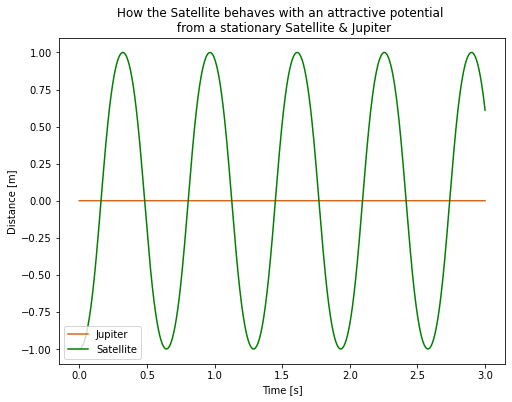

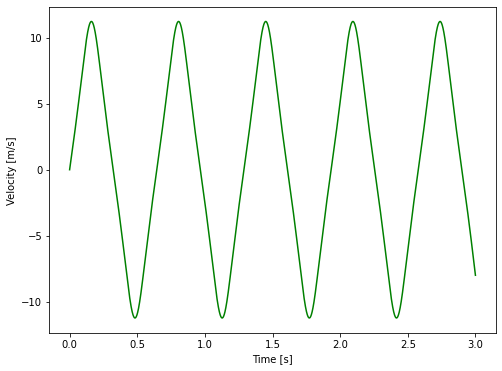

In [15]:
''' 
This code describes how a stationary particle is attracted to a stationary massive body.
'''

def oneD_orbit(X, t, A, G, M, vj):
    '''
    This function returns a 3-dimensional
    array of what needs to be solved
    '''
    x, v_x, x_j = X     # Z is a 3-dimensional array 
    
    R = np.sqrt(x**2)
    dxdt = v_x   # dx/dt
    dxjdt = vj # velocity of jupiter
    v_xdt = -2*(x-x_j)*A*G*M*np.exp(-(x-x_j)**2)  # This is a gaussian potential, to avoid a singularity at R=0. 
    dXdt = [dxdt, v_xdt, dxjdt]
    return dXdt

t = np.linspace(0,3,100000) 
X_0 = [-1,0,0]  # initial conditions of sat and jup

solution = odeint(oneD_orbit, X_0, t, args=(1, 1, 100, 0))

fig = plt.figure(figsize=(8,6))
plt.title('How the Satellite behaves with an attractive potential \n from a stationary Satellite & Jupiter')
plt.plot(t,solution[:,2], color='chocolate', label='Jupiter')
plt.plot(t,solution[:,0], color='green', label='Satellite')
plt.xlabel('Time [s]')
plt.ylabel('Distance [m]')
plt.legend()
plt.savefig('at stat x.png')
plt.show()

fig = plt.figure(figsize=(8,6))
plt.plot(t,solution[:,1], color='green', label='Satellite')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.savefig('at stat v.png')
plt.show()

From the above graph we can see that, when both particles are stationary, then the particle accelerates towards Jupiter (x=0), obtaining a maximum velocity at $x=0$, before decelerating and 'falling' back into it, with an oscillating motion and velocity. The satellite is trapped in this potential well, and as such this is not a gravity assist.

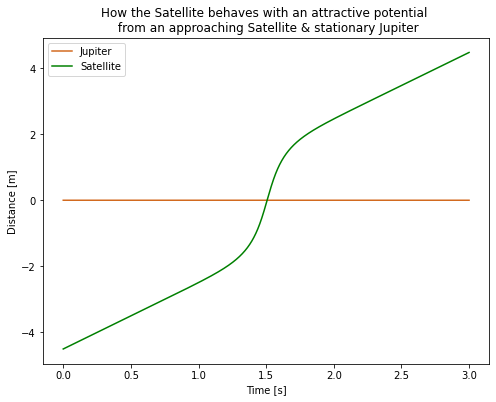

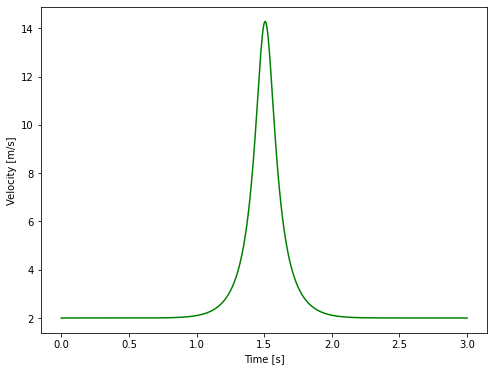

In [16]:
''' 
This code describes how an approaching particle is attracted to a stationary massive body.
'''

t = np.linspace(0,3,100000) 
X_0 = [-4.5,2,0]  # initial conditions of sat and jup

solution = odeint(oneD_orbit, X_0, t, args=(1, 1, 100, 0))

fig = plt.figure(figsize=(8,6))
plt.title('How the Satellite behaves with an attractive potential \n from an approaching Satellite & stationary Jupiter')
plt.plot(t,solution[:,2], color='chocolate', label='Jupiter')
plt.plot(t,solution[:,0], color='green', label='Satellite')
plt.xlabel('Time [s]')
plt.ylabel('Distance [m]') 
plt.legend()
plt.savefig('at mov x.png')
plt.show()

fig = plt.figure(figsize=(8,6))
plt.plot(t,solution[:,1], color='green', label='Satellite')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.savefig('at mov v.png')
plt.show()

We see here that the satellite, initialy travelling towards Jupiter, accelerates exponentially until it passess through the centre, before decelerating again and continuing to travel with the same velocity it started with. This is not a gravity assist as the final velocity remains unchanged.

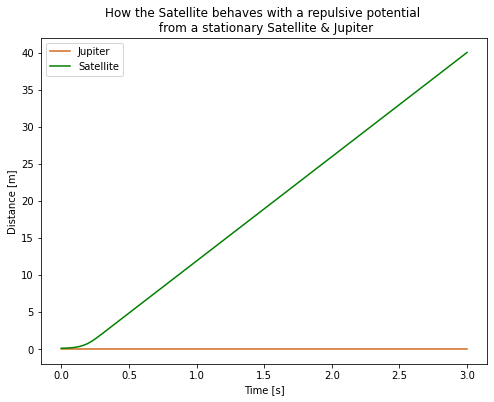

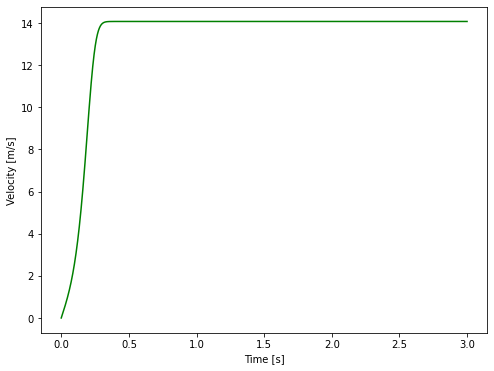

In [17]:
''' 
This code describes how a stationary particle is attracted to a stationary massive body.
'''

t = np.linspace(0,3,100000) 
X_0 = [0.1,0,0]  # initial conditions of sat and jup

solution = odeint(oneD_orbit, X_0, t, args=(-1, 1, 100, 0))

fig = plt.figure(figsize=(8,6))
plt.title('How the Satellite behaves with a repulsive potential \n from a stationary Satellite & Jupiter')
plt.plot(t,solution[:,2], color='chocolate', label='Jupiter')
plt.plot(t,solution[:,0], color='green', label='Satellite')
plt.xlabel('Time [s]')
plt.ylabel('Distance [m]') 
plt.legend()
plt.savefig('rep stat x.png')
plt.show()

fig = plt.figure(figsize=(8,6))
plt.plot(t,solution[:,1], color='green', label='Satellite')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.savefig('rep stat v.png')
plt.show()

We see here that the satellite is initially repelled by Jupiter, up until it no longer experiences the gravitational force, and its velocity remains constant. This describes a gravity assist as its final velocity is greater than its initial velocity. However, this is unphysical, as graivty is an attractive force, not repulsive.

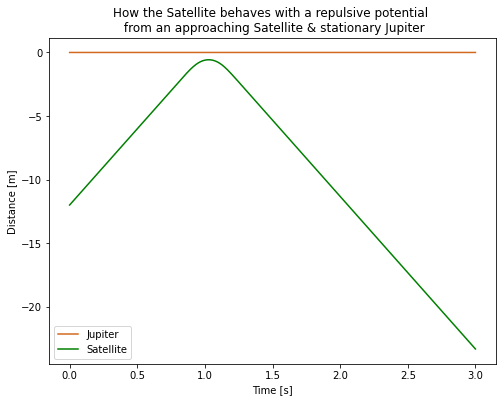

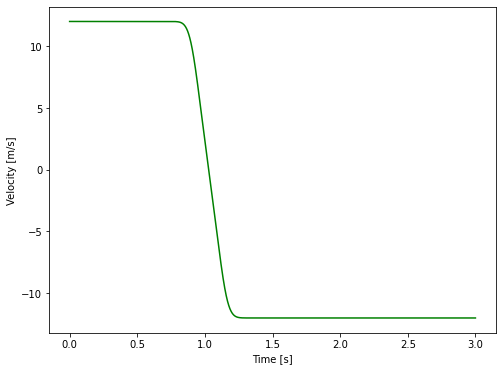

In [18]:
''' 
This code describes how a stationary particle is attracted to a stationary massive body.
'''

t = np.linspace(0,3,100000) 
X_0 = [-12,12,0]  # initial conditions of sat and jup

solution = odeint(oneD_orbit, X_0, t, args=(-1, 1, 100, 0))

fig = plt.figure(figsize=(8,6))
plt.title('How the Satellite behaves with a repulsive potential \n from an approaching Satellite & stationary Jupiter')
plt.plot(t,solution[:,2], color='chocolate', label='Jupiter')
plt.plot(t,solution[:,0], color='green', label='Satellite')
plt.xlabel('Time [s]')
plt.ylabel('Distance [m]') 
plt.legend()
plt.savefig('rep ap x.png')
plt.show()

fig = plt.figure(figsize=(8,6))
plt.plot(t,solution[:,1], color='green', label='Satellite')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.savefig('rep ap v.png')
plt.show()

This graph shows how the satellite decelerates as it approaches Jupiter, before being repelled in the opposite direction. We can see how the velocity before is equal to the velocity after, except the direction is different, so technically this is a gravity assist as the velocity has changed, although again it is unphysical due to the repulsive nature of this graivty.

In 1D we cannot get a gravity assist as the particle will always just be pulled back into the centre of the potential well, unless the well magically became repulsive. For a gravity assist to occur the particle needs to change direction, and so requires at least $\bf{two-dimensions}$.

##### (b) Provide a simple argument to predict the maximum gravity assist from Jupiter.

Maximum gravity assist is when $v_1 = 2u_2 - u_1$. We can prove this for a satellite which is launched from Earth's orbit with no additional velocity. In this case, $u_1 = 7406$ m/s is the velocity as it reaches Jupiter, and $u_2 = 13043.7$ m/s. This gives the maximum velocity $v_1 = 18681$ m/s, and maximum change of velocity (gravity assist) $\Delta v = 11273.9$ m/s

In [19]:
2*v_jup - 2*v_hohmann_jupiter # v_1 - u_1

11273.921960326394

##### (c) Extend your calculation to incorporate Jupiter’s gravitational potential, and decide a strategy to gain from the motion of Jupiter.

I will try and simulate the three body motion in one function. To prove that this can work I will first solve the equations of motion for Jupiter and the satellite simultaneously. 

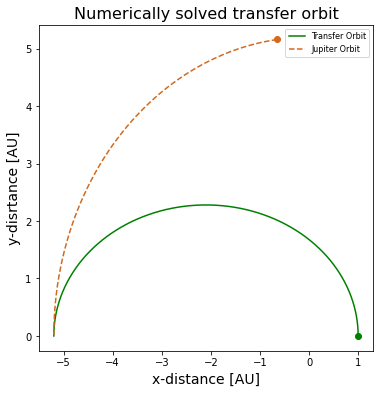

In [20]:
def orbit(Z, t, G, M):
    '''
    This function returns an 8-dimensional array to simultaneously solve
    the equations of motion for Jupiter and the satellite.
    '''
    x_sat, y_sat, v_xsat, v_ysat, x_jup, y_jup, v_xjup, v_yjup  = Z     # Z is an 8-dimensional array 
    
    R1 = np.sqrt(x_sat**2 + y_sat**2) # distance of sat from sun
    R2 = np.sqrt(x_jup**2 + y_jup**2) # distance of jupiter from sun
    
    dxsatdt = v_xsat   # velocity of satellite
    dysatdt = v_ysat  # velocity of satellite
    v_xsatdt = -G*M*x_sat/R1**3 # acceleration of satellite
    v_ysatdt = -G*M*y_sat/R1**3 # acceleration of satellite
    
    dxjupdt = v_xjup   # velocity of jupiter
    dyjupdt = v_yjup  # velocity of jupiter
    v_xjupdt = -G*M*x_jup/R2**3 # acceleration of jupiter
    v_yjupdt = -G*M*y_jup/R2**3 # acceleration of jupiter
    
    dZdt = [dxsatdt, dysatdt, v_xsatdt, v_ysatdt, dxjupdt, dyjupdt, v_xjupdt, v_yjupdt]
    return dZdt 

t = np.linspace(0,T_sat/2,10000)
Z_0 = [x_earth_sat, 0, 0, v_hohmann_earth, x_jup_sat, y_jup_sat, v_xjup, v_yjup]

sol_sat_and_jup = odeint(orbit, Z_0, t, args=(G, M_sun))

figure = plt.figure(figsize=(6,6))
plt.plot(sol_sat_and_jup[:,0]/AU, sol_sat_and_jup[:,1]/AU, label='Transfer Orbit', color='green')
plt.plot(sol_sat_and_jup[:,4]/AU, sol_sat_and_jup[:,5]/AU, label='Jupiter Orbit', color='chocolate',
         linestyle='--')
plt.plot(sol_sat_and_jup[0,0]/AU, sol_sat_and_jup[0,1]/AU, color='green', marker='o')
plt.plot(sol_sat_and_jup[0,4]/AU, sol_sat_and_jup[0,5]/AU, color='chocolate', marker='o')
plt.title('Numerically solved transfer orbit',size=16)
plt.xlabel('x-distance [AU]',size=14)
plt.ylabel('y-disrtance [AU]',size=14)
plt.legend(prop={'size':8})
plt.show()

It works!

Now to simulate the gravitational potential of Jupiter acting on the satellite and hopefully end up with a gravity assist.

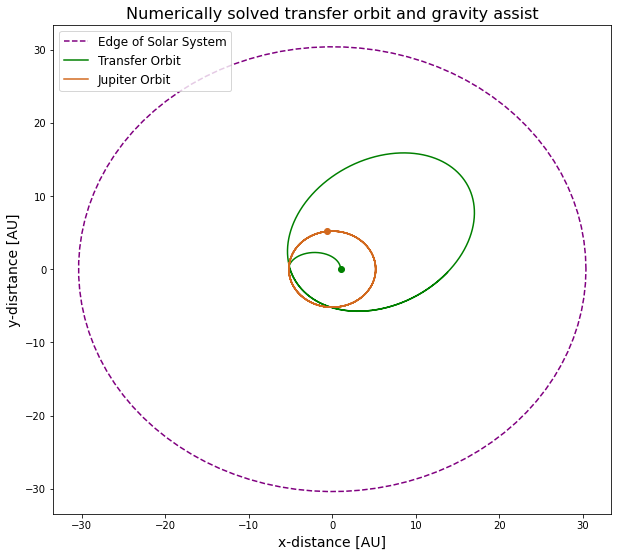

In [21]:
def orbit(Z, t, G, M1, M2):
    '''
    This function returns an 8-dimensional array to simultaneously solve
    the equations of motion for Jupiter and the satellite.
    '''
    x_sat, y_sat, v_xsat, v_ysat, x_jup, y_jup, v_xjup, v_yjup  = Z     # Z is an 8-dimensional array 
    
    R1 = np.sqrt(x_sat**2 + y_sat**2) # distance of sat from sun
    R2 = np.sqrt(x_jup**2 + y_jup**2) # distance of jupiter from sun
    R3 = np.sqrt((x_sat-x_jup)**2 + (y_sat-y_jup)**2) # distance of satellite from Jupiter
    
    dxsatdt = v_xsat   # velocity of satellite
    dysatdt = v_ysat  # velocity of satellite
    v_xsatdt = -G*M1*x_sat/R1**3 + G*M2*(x_jup-x_sat)/R3**3 # acceleration of satellite
    v_ysatdt = -G*M1*y_sat/R1**3 + G*M2*(y_jup-y_sat)/R3**3 # acceleration of satellite
    
    dxjupdt = v_xjup   # velocity of jupiter
    dyjupdt = v_yjup  # velocity of jupiter
    v_xjupdt = -G*M1*x_jup/R2**3 # acceleration of jupiter
    v_yjupdt = -G*M1*y_jup/R2**3 # acceleration of jupiter
    
    dZdt = [dxsatdt, dysatdt, v_xsatdt, v_ysatdt, dxjupdt, dyjupdt, v_xjupdt, v_yjupdt]
    return dZdt 

t = np.linspace(0,10*T_sat,100000)
Z_0 = [x_earth_sat, 0, 0, v_hohmann_earth, x_jup_sat, y_jup_sat, v_xjup, v_yjup] 

sol_sat_and_jup = odeint(orbit, Z_0, t, args=(G, M_sun, M_jup))

figure = plt.figure(figsize=(10,9))

''' Plotting edge of solar system'''
theta = np.linspace(0,2*np.pi,100)
r = 4.545e12 # radius of solar system in metres
x = r*np.cos(theta)
y = r*np.sin(theta)
plt.plot(x/AU,y/AU, linestyle='--', color='purple', label='Edge of Solar System')

''' Plotting gravity assist '''
plt.plot(sol_sat_and_jup[:,0]/AU, sol_sat_and_jup[:,1]/AU, label='Transfer Orbit', color='green')
plt.plot(sol_sat_and_jup[:,4]/AU, sol_sat_and_jup[:,5]/AU, label='Jupiter Orbit', color='chocolate',
         linestyle='-')
plt.plot(sol_sat_and_jup[0,0]/AU, sol_sat_and_jup[0,1]/AU, color='green', marker='o')
plt.plot(sol_sat_and_jup[0,4]/AU, sol_sat_and_jup[0,5]/AU, color='chocolate', marker='o')
plt.title('Numerically solved transfer orbit and gravity assist',size=16)
plt.xlabel('x-distance [AU]',size=14)
plt.ylabel('y-disrtance [AU]',size=14)
plt.legend(prop={'size':12})
plt.savefig('initial transfer.png')
plt.show()

This graph shows how a gravity assist automatically arises from the equations of motion. We see that the semi-major axis of the orbit of the satellite after passing Jupiter increases, and from the second graph we can see a sharp rise in the velocity, which is the gravity assist, and then the satellite proceeds along its elliptical orbit with varying velocity. 

If we want to give the satellite enough velocity to escape the solar system then we need to alter the initial conditions. The two initial conditions we can alter when launching a satellite is the satellite's initial velocity and the launch time/position of the satellite.

We will start by altering the initial velocity of the satellite, but instead of manually looking at each of the trajectories to see which one manages to escape the solar system, we instead look at whether the satellites have a velocity high enough to escape the gravitational pull of the sun.

This velocity is known as the $\bf{escape}$ $\bf{velocity}$, and is given by:

$v_{esc} = \sqrt{\frac{2GM_\odot}{R}}$

The satellite needs to have a velocity > $v_{esc}$ at any point after the gravity assist for it to have escaped.

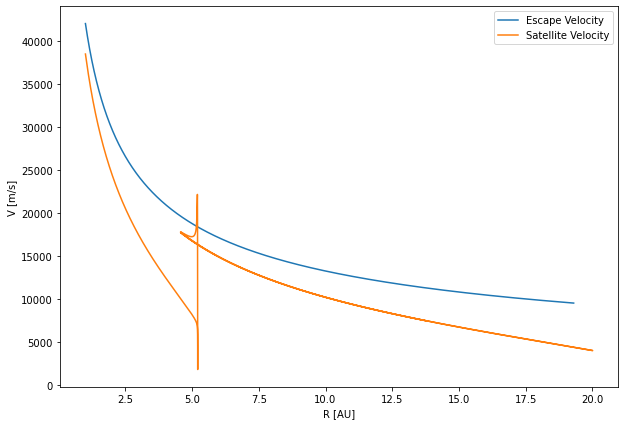

In [22]:
v_sat = np.sqrt(sol_sat_and_jup[:,3]**2 + sol_sat_and_jup[:,2]**2) # velocity of satellite
R_sat = np.sqrt(sol_sat_and_jup[:,0]**2 + sol_sat_and_jup[:,1]**2) # distance of satellite from Sun
R = np.linspace(R_eo,19.3*AU,10000) # starting at radius of earth orbit
v_esc = np.sqrt(2*G*M_sun/R)  # escape velocity, assuming mass of sun contains all the mass in the solar system

fig = plt.figure(figsize=(10,7))
plt.plot(R/AU,v_esc, label='Escape Velocity')
plt.plot(R_sat/AU,v_sat, label='Satellite Velocity')
plt.xlabel('R [AU]')
plt.ylabel('V [m/s]')
plt.legend()
plt.show()

We see here that if we do not alter any of the initial conditions, the gravitational pull of Jupiter alone is not enough to sling the satellite out of the solar system. We know this as the orange line in the graph above is always below the blue line (disregarding the numerical errors happening at the point when the satellite is accelerated by Jupiter at around $R \approx 5$ AU ).

#### Changing initial velocity to optimize gravity assist

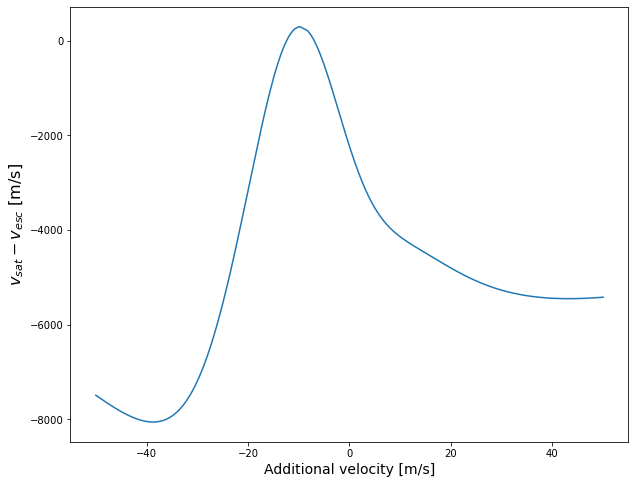

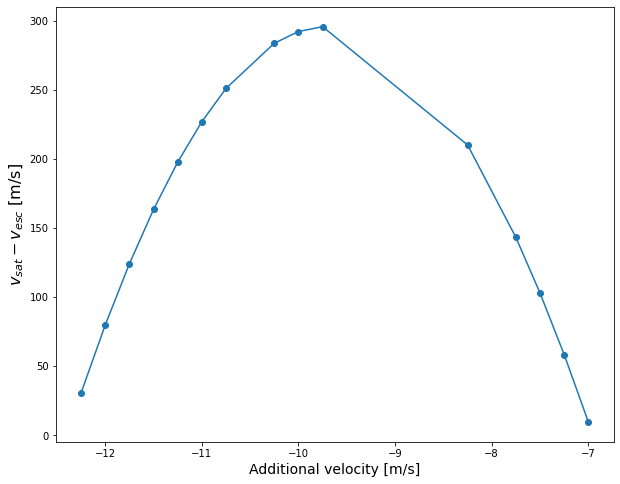

In [23]:
''' 
        Finding initial velocity of satellite needed to escape the solar system 
        
The satellite can (theoretically) be launched with any velocity up to the speed of light,
but this is not practically doable, so we will test additional velocities between -50m/s to 50m/s.
                
'''

points = 1000
t = np.linspace(0,2*T_sat,points)

number = 401 # number of different conditions we are testing
q = np.linspace(-50,50,number) # list of different initial velocity differences (i.e. v_hohmann_earth - 50 m/s)
q = q[q!=-9.0] # creates a list excluding -9.0 (which gives a numerical error when the satellite gets too close to Jupiter)
q = q[q!=-8.75] 
q = q[q!=-9.25]
q = q[q!=-8.5] 
q = q[q!=-10.5]
q = q[q!=-9.5]
q = q[q!=-8.0] # these also blow up...

Z_0 = [[x_earth_sat, 0, 0, v_hohmann_earth+q[n], x_jup_sat, y_jup_sat, v_xjup, v_yjup] for n in range(len(q))] 
# list of initial conditions # range(len(q)) because we are excluding four values from q
sol_sat_and_jup = [odeint(orbit, Z_0[n], t, args=(G, M_sun, M_jup)) for n in range(len(q))]
# list of solutions for each starting condition


v = [np.sqrt(sol_sat_and_jup[n][:,3]**2 + sol_sat_and_jup[n][:,2]**2) for n in range(len(q))]  
# list of satellite speeds for each initial condition 
R_sat = [np.sqrt(sol_sat_and_jup[n][:,0]**2 + sol_sat_and_jup[n][:,1]**2) for n in range(len(q))]
# list of satellite distance from Sun for each initial condition

R_sat_point = np.array([R_sat[n][int(points/2)] for n in range(len(q))]) # distance of satellite from sun at a specific point after gravity assist
v_sat_point = [v[n][int(points/2)] for n in range(len(q))] # velocity of satellite at a specific point after the gravity assist, to see if it is > v_esc

v_esc = np.sqrt(2*G*M_sun/R_sat_point)  # escape velocity, assuming mass of sun contains all the mass in the solar system

outcome = v_sat_point - v_esc # if outcome > 0 then the satellite can escape

fig=plt.figure(figsize=(10,8))
plt.plot(q,outcome)
plt.ylabel('$v_{sat} - v_{esc}$ [m/s]',size=16)
plt.xlabel('Additional velocity [m/s]',size=14)
plt.show()
fig=plt.figure(figsize=(10,8))
plt.plot(q[outcome>0],outcome[outcome>0], marker='o')
plt.ylabel('$v_{sat} - v_{esc}$ [m/s]',size=16)
plt.xlabel('Additional velocity [m/s]',size=14)
plt.savefig('optimised v.png')
plt.show()

From the graphs above we see that the satellite will only gain enough velocity to escape from the solar system if it has an additional velocity $-12.5 \leq v_{add} \leq -7$ m/s (where $v_{tot} = v_{hohmann} + v_{add}$) 

In [24]:
best_v_add = q[np.argmax(outcome)] # best additional velocity to use

print(f'The optimum additional velocity to launch the satellite with from Earth is {best_v_add} m/s')

The optimum additional velocity to launch the satellite with from Earth is -9.75 m/s


We can see the trajectory of the satellite with this initial velocity, and see that is does indeed completely leave the gravitational pull of the Sun.

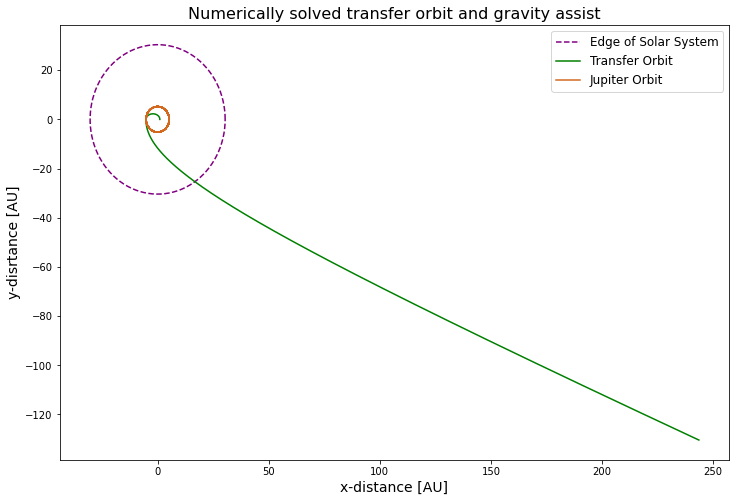

In [25]:
t = np.linspace(0,50*T_sat,10000) # we run the code for a long time period to see that the satellite does indeed leave the solar system
Z_0 = [x_earth_sat, 0, 0, v_hohmann_earth+best_v_add, x_jup_sat, y_jup_sat, v_xjup, v_yjup] # initial conditions to launch the satellite out of the solar system

sol_sat_and_jup = odeint(orbit, Z_0, t, args=(G, M_sun, M_jup))

figure = plt.figure(figsize=(12,8))

''' Plotting edge of solar system'''
# x and y defined earlier

plt.plot(x/AU,y/AU, linestyle='--', color='purple', label='Edge of Solar System')

''' Plotting gravity assist '''
plt.plot(sol_sat_and_jup[:,0]/AU, sol_sat_and_jup[:,1]/AU, label='Transfer Orbit', color='green')
plt.plot(sol_sat_and_jup[:,4]/AU, sol_sat_and_jup[:,5]/AU, label='Jupiter Orbit', color='chocolate',
         linestyle='-')
#plt.plot(sol_sat_and_jup[0,0]/AU, sol_sat_and_jup[0,1]/AU, color='green', marker='o')
#plt.plot(sol_sat_and_jup[0,4]/AU, sol_sat_and_jup[0,5]/AU, color='chocolate', marker='o')
plt.title('Numerically solved transfer orbit and gravity assist',size=16)
plt.xlabel('x-distance [AU]',size=14)
plt.ylabel('y-disrtance [AU]',size=14)
plt.legend(prop={'size':12})
plt.show()

#### What happens if we launch backwards very fast?

We know from our calculations of elastic collisions that a head on collision would result in a maximum gravity assist, but in order for this to happen, the satellite must orbit the Sun clockwise, and would require a lot of initial thrust to do so.

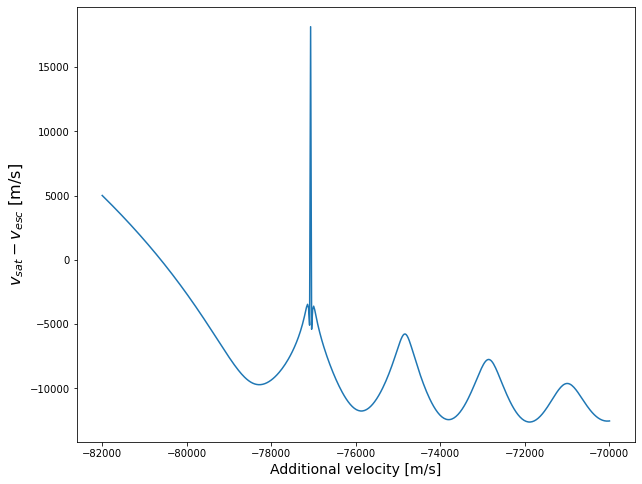

In [26]:
''' 
Finding initial velocity of satellite needed to escape the solar system going BACKWARDS

We will test what reverse velocity is needed to launch the satellite into a counter-clockwise
orbit, such that it collides with Jupiter and is gravity assisted in that way.

Note: this code takes a while because of the large spike, which is necessary to show that 
      the satellite can actually escape.
                
'''


points = 1000
t = np.linspace(0,2*T_sat,points)

number = 500 # number of different conditions we are testing
q = np.linspace(-82000,-70000,number) # list of different initial velocity differences (i.e. v_hohmann_earth - 50 m/s)

Z_0 = [[x_earth_sat, 0, 0, v_hohmann_earth+q[n], x_jup_sat, y_jup_sat, v_xjup, v_yjup] for n in range(number)] 
# list of initial conditions # range(number-4) because we are excluding four values from q
sol_sat_and_jup = [odeint(orbit, Z_0[n], t, args=(G, M_sun, M_jup)) for n in range(number)]
# list of solutions for each starting condition


v = [np.sqrt(sol_sat_and_jup[n][:,3]**2 + sol_sat_and_jup[n][:,2]**2) for n in range(number)]  
# list of satellite speeds for each initial condition 
R_sat = [np.sqrt(sol_sat_and_jup[n][:,0]**2 + sol_sat_and_jup[n][:,1]**2) for n in range(number)]
# list of satellite distance from Sun for each initial condition

R_sat_point = np.array([R_sat[n][int(points/2)] for n in range(number)]) # distance of satellite from sun at a specific point after gravity assist
v_sat_point = [v[n][int(points/2)] for n in range(number)] # velocity of satellite at a specific point after the gravity assist, to see if it is > v_esc

v_esc = np.sqrt(2*G*M_sun/R_sat_point)  # escape velocity, assuming mass of sun contains all the mass in the solar system

outcome = v_sat_point - v_esc # if outcome > 0 then the satellite can escape

fig=plt.figure(figsize=(10,8))
plt.plot(q,outcome)
plt.ylabel('$v_{sat} - v_{esc}$ [m/s]',size=16)
plt.xlabel('Additional velocity [m/s]',size=14)
plt.show()

After some trial and error to test which range of velocities to use, we arrive at the above graph. 

The trial and error was done by taking additional velocities starting at -40,000 m/s (to oppose the motion of the Earth), and going down in -10,000 m/s increments until it was clear that the satellite was moving in a counter-clockwise trajectory towards Jupiter. The graph above shows a suitable range which demonstrates that there is a small window of velocities which allow for the assist, and velocities after this will allow the satellite to escape the solar system anyway.

This short window is due to the fact that for the assist to happen, the satellite needs to collide head on with Jupiter, which is why there is such a sharp spike at the velocities that this happens at. At other velocities the satellite misses Jupiter and thus doesn't give the necessary gravity assist

The maximum value in the above graph corresponds to the exact point the satellite collides with Jupiter. This happens when the satellite is given an additional velocity of around 77,070 m/s. Slight changes in this velocity will change the angle at which the satellite 'hits' Jupiter, and thus will change the gravity assist. At velocities greater than around 81,000 m/s the satellite can escape anyway, but it does this by getting a gravity assist just from the Sun.

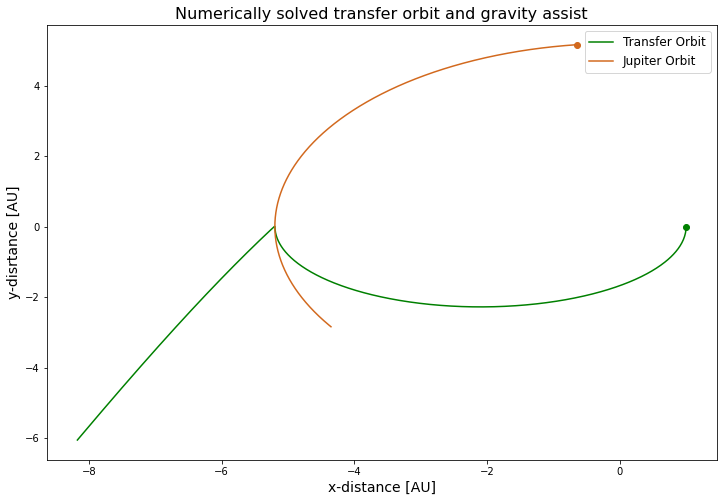

In [27]:
t = np.linspace(0,0.7*T_sat,1000)
Z_0 = [x_earth_sat, 0, 0, v_hohmann_earth-77070, x_jup_sat, y_jup_sat, v_xjup, v_yjup]

sol_sat_and_jup = odeint(orbit, Z_0, t, args=(G, M_sun, M_jup))

figure = plt.figure(figsize=(12,8))

''' Plotting gravity assist '''
plt.plot(sol_sat_and_jup[:,0]/AU, sol_sat_and_jup[:,1]/AU, label='Transfer Orbit', color='green')
plt.plot(sol_sat_and_jup[:,4]/AU, sol_sat_and_jup[:,5]/AU, label='Jupiter Orbit', color='chocolate',
         linestyle='-')
plt.plot(sol_sat_and_jup[0,0]/AU, sol_sat_and_jup[0,1]/AU, color='green', marker='o')
plt.plot(sol_sat_and_jup[0,4]/AU, sol_sat_and_jup[0,5]/AU, color='chocolate', marker='o')
plt.title('Numerically solved transfer orbit and gravity assist',size=16)
plt.xlabel('x-distance [AU]',size=14)
plt.ylabel('y-disrtance [AU]',size=14)
plt.legend(prop={'size':12})
plt.show()

Here we see the satellite collide with Jupiter and rebound off in a different direction, with a much greater velocity that it had before. The course of Jupiter is unaffected as $M_{Jup} >> M_{sat}$

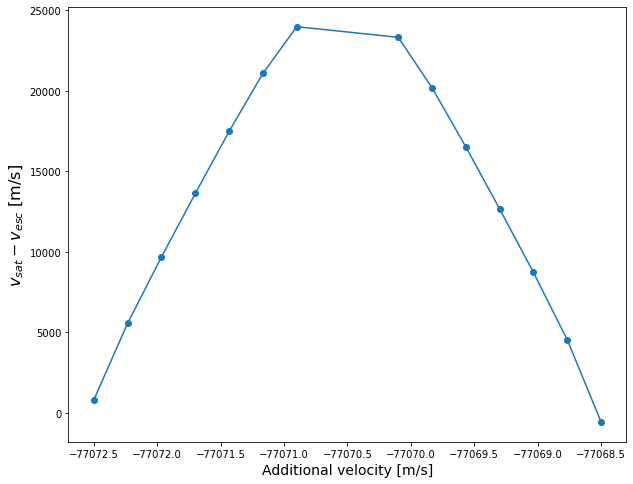

In [28]:
### NOTE: Due to infinities this code can be annoying. I have excluded the values which give infinities.

''' 

This code finds the velocities around 77,070 m/s which give a gravity assist large enough to
escape from the solar system
                
'''

points = 1000
t = np.linspace(0,20*T_sat,points)

number = 16 # number of different conditions we are testing
q = np.linspace(-77072.5,-77068.5,number) # list of different initial velocity differences (i.e. v_hohmann_earth - 50 m/s)
q = q[q!=-77070.36666666667]
q = q[q!=-77070.63333333333] # these value blows up

Z_0 = [[x_earth_sat, 0, 0, v_hohmann_earth+q[n], x_jup_sat, y_jup_sat, v_xjup, v_yjup] for n in range(len(q))] 
# list of initial conditions # range(len(q)) is more accurate than range(number-1)
sol_sat_and_jup = [odeint(orbit, Z_0[n], t, args=(G, M_sun, M_jup)) for n in range(len(q))]
# list of solutions for each starting condition


v = [np.sqrt(sol_sat_and_jup[n][:,3]**2 + sol_sat_and_jup[n][:,2]**2) for n in range(len(q))]  
# list of satellite speeds for each initial condition 
R_sat = [np.sqrt(sol_sat_and_jup[n][:,0]**2 + sol_sat_and_jup[n][:,1]**2) for n in range(len(q))]
# list of satellite distance from Sun for each initial condition

R_sat_point = np.array([R_sat[n][int(points/2)] for n in range(len(q))]) # distance of satellite from sun at a specific point after gravity assist
v_sat_point = [v[n][int(points/2)] for n in range(len(q))] # velocity of satellite at a specific point after the gravity assist, to see if it is > v_esc

v_esc = np.sqrt(2*G*M_sun/R_sat_point)  # escape velocity, assuming mass of sun contains all the mass in the solar system

outcome = v_sat_point - v_esc # if outcome > 0 then the satellite can escape

fig=plt.figure(figsize=(10,8))
plt.plot(q,outcome, marker='o')
plt.ylabel('$v_{sat} - v_{esc}$ [m/s]',size=16)
plt.xlabel('Additional velocity [m/s]',size=14)
plt.show()

Similar to before, we have a value which blows up, which we have omitted from the graph (77,070.5 m/s). We can see that each of these initial velocities give a gravity assist, however, as we will shortly see, they each result in a different satellite trajectory. 

The best initial velocity to give the largest assist is somewhere around 77,070.5 m/s.

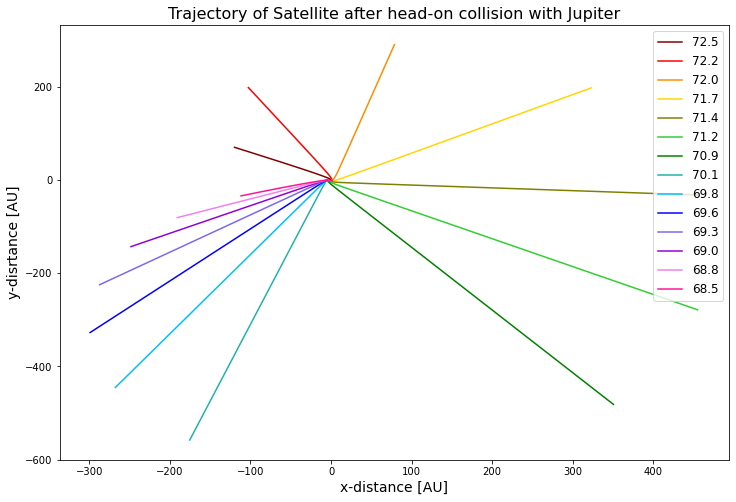

In [29]:
''' Plotting trajectory of satellite for each velocity '''
fig = plt.figure(figsize=(12,8))

plt.plot(sol_sat_and_jup[0][:,0]/AU, sol_sat_and_jup[0][:,1]/AU, label='Transfer Orbit', color='maroon')
plt.plot(sol_sat_and_jup[1][:,0]/AU, sol_sat_and_jup[1][:,1]/AU, label='Transfer Orbit', color='red')
plt.plot(sol_sat_and_jup[2][:,0]/AU, sol_sat_and_jup[2][:,1]/AU, label='Transfer Orbit', color='darkorange')
plt.plot(sol_sat_and_jup[3][:,0]/AU, sol_sat_and_jup[3][:,1]/AU, label='Transfer Orbit', color='gold')
plt.plot(sol_sat_and_jup[4][:,0]/AU, sol_sat_and_jup[4][:,1]/AU, label='Transfer Orbit', color='olive')
plt.plot(sol_sat_and_jup[5][:,0]/AU, sol_sat_and_jup[5][:,1]/AU, label='Transfer Orbit', color='limegreen')
plt.plot(sol_sat_and_jup[6][:,0]/AU, sol_sat_and_jup[6][:,1]/AU, label='Transfer Orbit', color='green')
plt.plot(sol_sat_and_jup[7][:,0]/AU, sol_sat_and_jup[7][:,1]/AU, label='Transfer Orbit', color='lightseagreen')
plt.plot(sol_sat_and_jup[8][:,0]/AU, sol_sat_and_jup[8][:,1]/AU, label='Transfer Orbit', color='deepskyblue')
plt.plot(sol_sat_and_jup[9][:,0]/AU, sol_sat_and_jup[9][:,1]/AU, label='Transfer Orbit', color='blue')
plt.plot(sol_sat_and_jup[10][:,0]/AU, sol_sat_and_jup[10][:,1]/AU, label='Transfer Orbit', color='mediumslateblue')
plt.plot(sol_sat_and_jup[11][:,0]/AU, sol_sat_and_jup[11][:,1]/AU, label='Transfer Orbit', color='darkviolet')
plt.plot(sol_sat_and_jup[12][:,0]/AU, sol_sat_and_jup[12][:,1]/AU, label='Transfer Orbit', color='violet')
plt.plot(sol_sat_and_jup[13][:,0]/AU, sol_sat_and_jup[13][:,1]/AU, label='Transfer Orbit', color='deeppink')

plt.title('Trajectory of Satellite after head-on collision with Jupiter',size=16)
plt.xlabel('x-distance [AU]',size=14)
plt.ylabel('y-disrtance [AU]',size=14)
plt.legend(np.abs(np.round(q+77000,1)),prop={'size':12})
plt.savefig('rainbow.png')
plt.show()

The legend in the above graph is showing the last 3 digits of the initial additional velocity, i.e. the red line is the trajectory of the satellite given an additional velocity of 77,072.2 m/s. 

We can see that depending on the velocity of the satellite, the collision angle changes, and as a result the 'rebound' angle is also different. Using this graph we can choose an optimal velocity depending on where we want the satellite to go. 

However we should still rememeber that in order to accelerate the satellite by 77,000 m/s a lot of energy is required, and so this in reality would never be done.

What is does show is how the gravity assist that we modelled as an elastic collision works.

#### Changing initial position to optimize gravity assist

We can use a similar procedure to see if there is an optimal position to launch the satellite from. Noting that, when changing the position of the planets, we must also change the initial velocity components.

The velocity is found by taking the equations for $x$ and $y$ used earlier and differentiating wrt to time.

$x = r \cos\left(\frac{2 \pi t}{T}\right)$

$y = r \sin\left(\frac{2 \pi t}{T}\right)$

$v_x = -\frac{2\pi r}{T} \sin\left(\frac{2 \pi t}{T}\right)$

$v_y = \frac{2\pi r}{T} \cos\left(\frac{2 \pi t}{T}\right)$

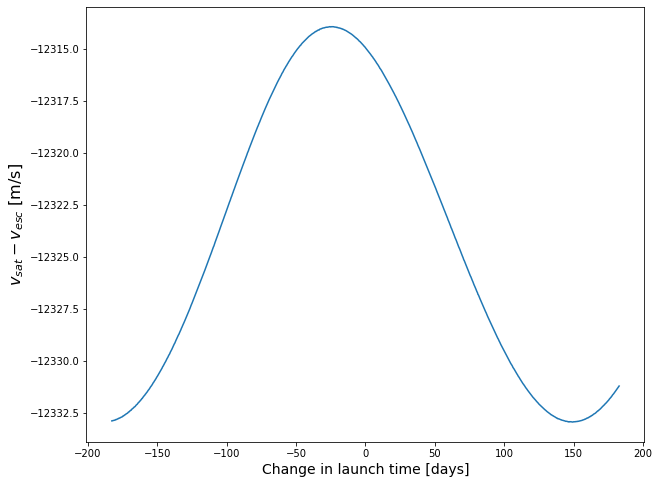

In [30]:
points = 1000
t = np.linspace(0,2*T_sat,points)


''' Finding the different initial conditions to be integrated '''

number = 1000
q = np.linspace(-0.5*T_earth,0.5*T_earth,number)

x_earth = R_eo * np.cos(2*np.pi*q/T_earth) 
y_earth = R_eo * np.sin(2*np.pi*q/T_earth)
v_xearth = -(2*np.pi*R_eo/T_earth) * np.sin(2*np.pi*q/T_earth) # velocity equation found by differentiating position equation
v_yearth = (2*np.pi*R_eo/T_earth) * np.cos(2*np.pi*q/T_earth)

x_jup = -R_jo * np.cos(2*np.pi*(q-0.5*T_sat)/T_jup)
y_jup = R_jo * np.sin(2*np.pi*(q-0.5*T_sat)/T_jup)
v_xjup = (2*np.pi*R_jo/T_jup) * np.sin(2*np.pi*(q-0.5*T_sat)/T_jup)
v_yjup = (2*np.pi*R_jo/T_jup) * np.cos(2*np.pi*(q-0.5*T_sat)/T_jup)

''' Integrating to find optimum launch position '''

Z_0 = [[x_earth[n], y_earth[n], v_xearth[n], v_yearth[n],
        x_jup[n], y_jup[n], v_xjup[n], v_yjup[n]] for n in range(len(q))]

sol_sat_and_jup = [odeint(orbit, Z_0[n], t, args=(G, M_sun, M_jup)) 
                   for n in range(len(q))]

v = [np.sqrt(sol_sat_and_jup[n][:,2]**2 + sol_sat_and_jup[n][:,3]**2) 
     for n in range(len(q))]  # list of satellite speeds for each initial condition 

R_sat = [np.sqrt(sol_sat_and_jup[n][:,0]**2 + sol_sat_and_jup[n][:,1]**2) 
         for n in range(len(q))]  # list of satellite distance from Sun for each initial condition

R_sat_point = np.array([R_sat[n][int(3*points/4)] for n in range(len(q))]) # distance of satellite from sun at a specific point after gravity assist
v_sat_point = [v[n][int(3*points/4)] for n in range(len(q))] # velocity of satellite at a specific point after the gravity assist, to see if it is > v_esc

v_esc = np.sqrt(2*G*M_sun/R_sat_point)  # escape velocity, assuming mass of sun contains all the mass in the solar syste
outcome = v_sat_point - v_esc # if outcome > 0 then the satellite can escape

fig=plt.figure(figsize=(10,8))
plt.plot(q/(24*60**2),outcome)
plt.ylabel('$v_{sat} - v_{esc}$ [m/s]',size=16)
plt.xlabel('Change in launch time [days]',size=14)
plt.savefig('optimised position.png')
plt.show()

#fig=plt.figure(figsize=(10,8))
#plt.plot(q[outcome>0]/(60**2),outcome[outcome>0], marker='o')
#plt.ylabel('$v_{sat} - v_{esc}$ [m/s]',size=16)
#plt.xlabel('Change in launch time [hours]',size=14)
#plt.show()

In [31]:
q[np.argmax(outcome)]/(24*60**2)

-24.32485841396612

As we can see from the graph above, there is no position which would result in a gravity assist sufficient enough to expell the satellite from the solar system, but we can see that the ideal position which results in the maximum gravity assist is at 24 days before the initial launch time.

##### (d) Can the satellite escape from the Solar system?

Yes, most definitely. 

##### (e) Can you escape the solar system using Mars? (You will need to look up Mars data).

In [33]:
M_mars = 0.64171e24 # kg # mass of Mars
R_mars = 3389.5e3 # m # radius of Mars
R_mo = 227.923e9 # m # orbital radius of Mars

T_mars = 2*np.pi*R_mo**(3/2)/(np.sqrt(G*M_sun))
v_mars = np.sqrt(G*M_sun/R_mo)

Let's first try a Mars gravity assist with no additional velocities or changing launch times and see what happens.

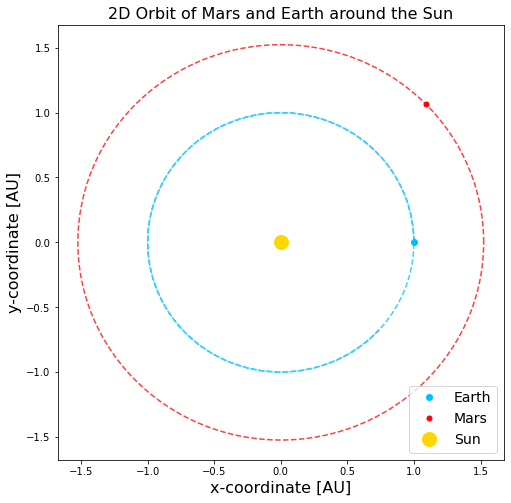

The Earth must be 16.000E+10 m away from Mars at launch, or 1.07 AU.


1.523571150668791

In [34]:
''' Finding the distance between Earth and Mars at launch time '''

a_sat = 0.5*(R_eo + R_mo)
T_sat = 2*np.pi*a_sat**(3/2)/(np.sqrt(G*M_sun))  # time period of satellite - only depends on semi-major axis

points = 1000000  # sets precision of time. If this was actually NASA then set points to 1e9, but that takes too long...
t = np.linspace(0,T_mars,points)  # time from 0 to one full orbit for Mars

t_spacing = t[2]-t[1] # time interval between points in seconds, more precice if number of points is larger

launch_pos_subtractor = int(0.5* T_sat/t_spacing) # number of points we need to go back from peak position when launching


''' Coordinates of Earth and Mars as a function of time '''

x_mars = R_mo*np.cos(2*np.pi*t/T_mars)
y_mars = R_mo*np.sin(2*np.pi*t/T_mars)

x_earth = R_eo*np.cos(2*np.pi*t/T_earth)
y_earth = R_eo*np.sin(2*np.pi*t/T_earth)

Distance = np.sqrt((x_mars-x_earth)**2 + (y_mars-y_earth)**2) # distance between Mars and Earth

''' Finding when the satellite launches '''

x_mars_sat = -x_mars[points-1 - launch_pos_subtractor] # x position of Mars at satellite launch
y_mars_sat = -y_mars[points-1 - launch_pos_subtractor] # y position of Mars at satellite launch


# Note: final x-position of Jupiter is at x_jup[points-1], after one full orbit. We are subtracting the number of points
# which corresponds to 1/2 T_sat before the satellite reaches Jupiter. This is to ensure that the satellite reaches Jupiter
# at the final x-position.

# We know that, at launch, the Earth needs to be situated such that it is furthest away from where Jupiter would be when
# it is intercepted with the satellite. The y-position of Earth, if we look at the graph above is zero at launch.

x_earth_sat = -np.min(x_earth) 
y_earth_sat = 0

launch_distance = np.sqrt((x_mars_sat - x_earth_sat)**2 + (y_mars_sat - y_earth_sat)**2)


fig = plt.figure(figsize=(8,8))
ax = plt.plot(x_mars/AU, y_mars/AU, 'red', linestyle='--', alpha=0.75)
ax = plt.plot(x_earth/AU, y_earth/AU, 'deepskyblue', linestyle='--', alpha=0.75)
plt.plot(x_earth_sat/AU, 0, 'deepskyblue', marker='o', linestyle='', markersize=6, label='Earth')
plt.plot(x_mars_sat/AU,y_mars_sat/AU,'red', marker = 'o', linestyle='', markersize=5, label='Mars')
plt.plot(0, 0, 'gold', marker='o', linestyle='', markersize=14, label='Sun')
plt.xlabel('x-coordinate [AU]', size=16)
plt.ylabel('y-coordinate [AU]', size=16)
plt.title('2D Orbit of Mars and Earth around the Sun', size=16)
plt.legend(loc = 'lower right', prop={'size':14})
plt.show()

print(f'The Earth must be {launch_distance/1e10:.3f}E+10 m away from Mars at launch, or {launch_distance/AU:.2f} AU.')

np.max(x_mars/AU)

In [35]:
''' Using cosine rule again to find v_x and v_y for Mars '''

a = np.sqrt((0-x_mars_sat)**2 + (R_mo - y_mars_sat)**2)
b = c = R_mo
angle = np.arccos((b**2 + c**2 - a**2)/(2*b*c))


v_xmars = -v_mars*np.cos(angle)
v_ymars = v_mars*np.sin(angle)

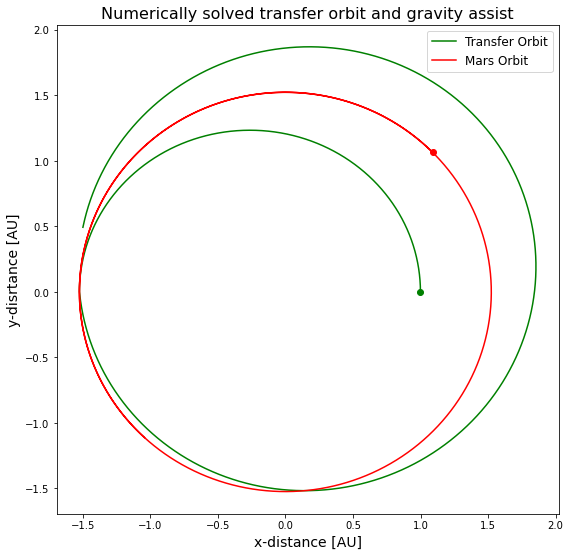

In [36]:
def orbit(Z, t, G, M1, M2):
    '''
    This function returns an 8-dimensional array to simultaneously solve
    the equations of motion for Mars and the satellite.
    '''
    x_sat, y_sat, v_xsat, v_ysat, x_mars, y_mars, v_xmars, v_ymars  = Z     # Z is an 8-dimensional array 
    
    R1 = np.sqrt(x_sat**2 + y_sat**2) # distance of sat from sun
    R2 = np.sqrt(x_mars**2 + y_mars**2) # distance of mars from sun
    R3 = np.sqrt((x_sat-x_mars)**2 + (y_sat-y_mars)**2) # distance of satellite from mars
    
    dxsatdt = v_xsat   # velocity of satellite
    dysatdt = v_ysat  # velocity of satellite
    v_xsatdt = -G*M1*x_sat/R1**3 + G*M2*(x_mars-x_sat)/R3**3 # acceleration of satellite
    v_ysatdt = -G*M1*y_sat/R1**3 + G*M2*(y_mars-y_sat)/R3**3 # acceleration of satellite
    
    dxmarsdt = v_xmars   # velocity of mars
    dymarsdt = v_ymars  # velocity of mars
    v_xmarsdt = -G*M1*x_mars/R2**3 # acceleration of mars
    v_ymarsdt = -G*M1*y_mars/R2**3 # acceleration of mars
    
    dZdt = [dxsatdt, dysatdt, v_xsatdt, v_ysatdt, dxmarsdt, dymarsdt, v_xmarsdt, v_ymarsdt]
    return dZdt 

v_hohmann_earth = np.sqrt(mu*(2/R_eo - 1/a_sat))
t = np.linspace(0,2*T_sat,10000)
Z_0 = [x_earth_sat, 0, 0, v_hohmann_earth, x_mars_sat, y_mars_sat, v_xmars, v_ymars]

sol_sat_and_mars = odeint(orbit, Z_0, t, args=(G, M_sun, M_mars))

figure = plt.figure(figsize=(9,9))

''' Plotting edge of solar system'''
theta = np.linspace(0,2*np.pi,100)
r = 4.545e12 # radius of solar system in metres
x = r*np.cos(theta)
y = r*np.sin(theta)
#plt.plot(x/AU,y/AU, linestyle='--', color='purple', label='Edge of Solar System')

''' Plotting gravity assist '''
plt.plot(sol_sat_and_mars[:,0]/AU, sol_sat_and_mars[:,1]/AU, label='Transfer Orbit', color='green')
plt.plot(sol_sat_and_mars[:,4]/AU, sol_sat_and_mars[:,5]/AU, label='Mars Orbit', color='red',
         linestyle='-')
plt.plot(sol_sat_and_mars[0,0]/AU, sol_sat_and_mars[0,1]/AU, color='green', marker='o')
plt.plot(sol_sat_and_mars[0,4]/AU, sol_sat_and_mars[0,5]/AU, color='red', marker='o')
plt.title('Numerically solved transfer orbit and gravity assist',size=16)
plt.xlabel('x-distance [AU]',size=14)
plt.ylabel('y-disrtance [AU]',size=14)
plt.legend(prop={'size':12})
plt.show()

Gravity assist from Mars on its own is not enough to escape the solar system. 

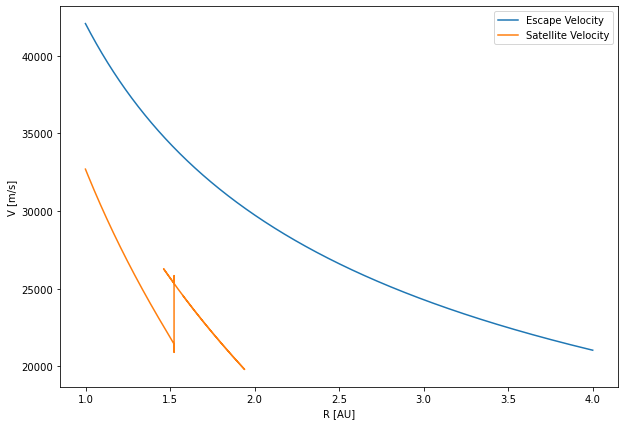

In [37]:
v_sat = np.sqrt(sol_sat_and_mars[:,3]**2 + sol_sat_and_mars[:,2]**2)
R_sat = np.sqrt(sol_sat_and_mars[:,0]**2 + sol_sat_and_mars[:,1]**2) # distance of satellite from Sun
R = np.linspace(R_eo,4*AU,10000) # starting at radius of earth orbit
v_esc_sun = np.sqrt(2*G*M_sun/R)  # escape velocity, assuming mass of sun contains all the mass in the solar system

fig = plt.figure(figsize=(10,7))
plt.plot(R/AU,v_esc_sun, label='Escape Velocity')
plt.plot(R_sat/AU,v_sat, label='Satellite Velocity')
plt.xlabel('R [AU]')
plt.ylabel('V [m/s]')
plt.legend()
plt.show()

#### Changing initial velocity to optimize gravity assist

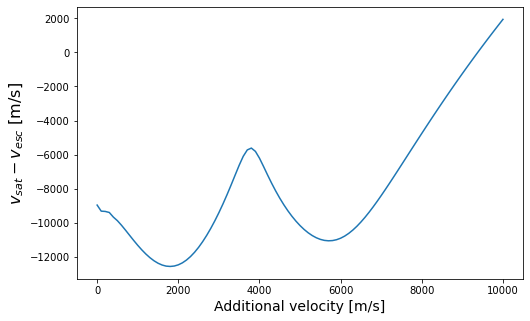

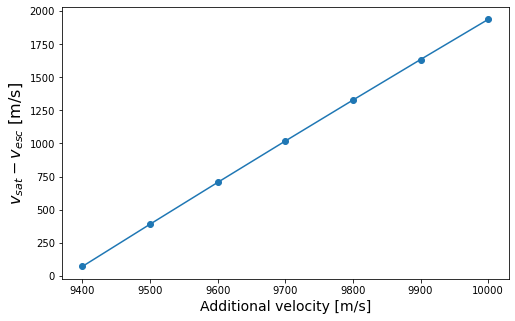

In [38]:
''' 
        Finding initial velocity of satellite needed to escape the solar system 
        
The satellite can (theoretically) be launched with any velocity up to the speed of light,
but this is not practically doable, so we will test additional velocities between -100m/s to 100m/s, 
which still encompasses a range much larger than a satellite would actually be launched at.
                
'''

points = 10000
t = np.linspace(0,4*T_sat,points)

number = 101 # number of different conditions we are testing
q = np.linspace(0,10000,number) # list of different additional velocities


Z_0 = [[x_earth_sat, 0, 0, v_hohmann_earth+q[n], x_mars_sat, y_mars_sat, v_xmars, v_ymars] for n in range(len(q))] 

sol_sat_and_mars = [odeint(orbit, Z_0[n], t, args=(G, M_sun, M_mars)) for n in range(len(q))]
# list of solutions for each starting condition


v = [np.sqrt(sol_sat_and_mars[n][:,3]**2 + sol_sat_and_mars[n][:,2]**2) for n in range(len(q))]  
# list of satellite speeds for each initial condition 
R_sat = [np.sqrt(sol_sat_and_mars[n][:,0]**2 + sol_sat_and_mars[n][:,1]**2) for n in range(len(q))]
# list of satellite distance from Sun for each initial condition

R_sat_point = np.array([R_sat[n][int(points/2)] for n in range(len(q))]) # distance of satellite from sun at a specific point after gravity assist
v_sat_point = [v[n][int(points/2)] for n in range(len(q))] # velocity of satellite at a specific point after the gravity assist, to see if it is > v_esc

v_esc = np.sqrt(2*G*M_sun/R_sat_point)  # escape velocity, assuming mass of sun contains all the mass in the solar system

outcome = v_sat_point - v_esc # if outcome > 0 then the satellite can escape

fig=plt.figure(figsize=(8,5))
plt.plot(q,outcome)
plt.ylabel('$v_{sat} - v_{esc}$ [m/s]',size=16)
plt.xlabel('Additional velocity [m/s]',size=14)
plt.show()
fig=plt.figure(figsize=(8,5))
plt.plot(q[outcome>0],outcome[outcome>0], marker='o')
plt.ylabel('$v_{sat} - v_{esc}$ [m/s]',size=16)
plt.xlabel('Additional velocity [m/s]',size=14)
plt.show()

From the graph above we see that we could only launch a satellite out of the solar system if it is given an initial velocity of at least 9380 m/s, however, as we can see from the escape velocity graph below, the satellite always had enough velocity to escape the solar system, and is travelling so fast that it doesn't even interact with Mars at all.

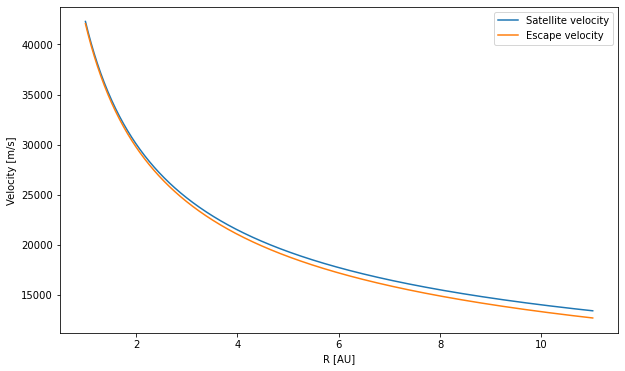

In [41]:
v_esc = np.sqrt(2*G*M_sun/R_sat[number-5])

fig = plt.figure(figsize=(10,6))
plt.plot(R_sat[number-5]/AU,v[number-5], label='Satellite velocity')
plt.plot(R_sat[number-5]/AU,v_esc, label='Escape velocity')
plt.ylabel('Velocity [m/s]')
plt.xlabel('R [AU]')
plt.legend()
plt.savefig('mars escape.png')
plt.show()

If we remove Mars from the equations all together, we see that the satellite would escape the solar system anyway, and there is actually no gravity assist occuring.

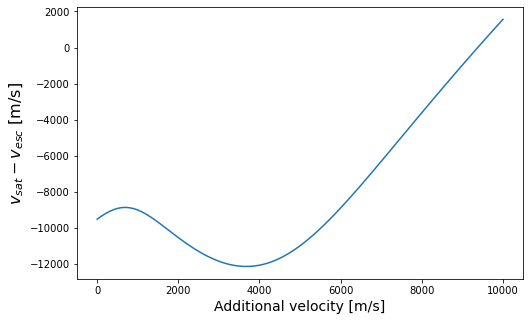

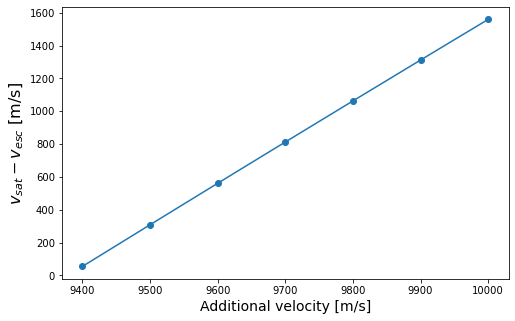

In [40]:
''' 
        Finding initial velocity of satellite needed to escape the solar system 
        
The satellite can (theoretically) be launched with any velocity up to the speed of light,
but this is not practically doable, so we will test additional velocities between -100m/s to 100m/s, 
which still encompasses a range much larger than a satellite would actually be launched at.
                
'''

points = 1000
t = np.linspace(0,2.1*T_sat,points)

number = 101 # number of different conditions we are testing
q = np.linspace(0,10000,number) # different additional velocities


Z_0 = [[x_earth_sat, 0, 0, v_hohmann_earth+q[n], x_mars_sat, y_mars_sat, v_xmars, v_ymars] for n in range(len(q))] 

sol_sat_and_mars = [odeint(orbit, Z_0[n], t, args=(G, M_sun, 0)) for n in range(len(q))] # SETTING M_MARS = 0
# list of solutions for each starting condition


v = [np.sqrt(sol_sat_and_mars[n][:,3]**2 + sol_sat_and_mars[n][:,2]**2) for n in range(len(q))]  
# list of satellite speeds for each initial condition 
R_sat = [np.sqrt(sol_sat_and_mars[n][:,0]**2 + sol_sat_and_mars[n][:,1]**2) for n in range(len(q))]
# list of satellite distance from Sun for each initial condition

R_sat_point = np.array([R_sat[n][int(points/2)] for n in range(len(q))]) # distance of satellite from sun at a specific point after gravity assist
v_sat_point = [v[n][int(points/2)] for n in range(len(q))] # velocity of satellite at a specific point after the gravity assist, to see if it is > v_esc

v_esc = np.sqrt(2*G*M_sun/R_sat_point)  # escape velocity, assuming mass of sun contains all the mass in the solar system

outcome = v_sat_point - v_esc # if outcome > 0 then the satellite can escape

fig=plt.figure(figsize=(8,5))
plt.plot(q,outcome)
plt.ylabel('$v_{sat} - v_{esc}$ [m/s]',size=16)
plt.xlabel('Additional velocity [m/s]',size=14)
plt.show()
fig=plt.figure(figsize=(8,5))
plt.plot(q[outcome>0],outcome[outcome>0], marker='o')
plt.ylabel('$v_{sat} - v_{esc}$ [m/s]',size=16)
plt.xlabel('Additional velocity [m/s]',size=14)
plt.show()

Therefore, we must conclude that a gravity assist large enough to leave the solar system $\bf{IS}$ $\bf{NOT}$ possible using Mars.